# Fashion MNIST
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [2]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.layers import Input
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten
from keras.models import Model
from keras.optimizers import RMSprop
from keras.utils import np_utils
from matplotlib import pyplot as pl
from sklearn import metrics as me

from utils import plot_confusion_matrix

% matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


First, create some useful functions

In [3]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()

    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0 * array.shape[1], dim_0 * array.shape[2]))


def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0] + 0.5, temp_out.shape[1]))
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0] + 0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both',
                   bottom='off', top='off', left='off', right='off',
                   labelbottom='off', labelleft='off')
    pl.title(title)


def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1]) - 0.4, temp_out[0, :])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

Load the `mnist` dataset and normalize in the range [0, 1]

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


In [5]:
print('X_train.shape = ', X_train.shape)
print('Y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('Y_test.shape = ', Y_test.shape)

X_train.shape =  (60000, 28, 28, 1)
Y_train.shape =  (60000, 10)
X_test.shape =  (10000, 28, 28, 1)
Y_test.shape =  (10000, 10)


Create the CNN and show its architecture

In [6]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(10, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         234       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 9)         2034      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 9)           0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 16)          1312      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 16)          0     

Define some constants and train de CNN

In [7]:
batch_size = 128
n_epoch = 50

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 10s 23ms/step - loss: 0.5964 - accuracy: 0.8121 - val_loss: 0.2451 - val_accuracy: 0.9218
Epoch 2/10
422/422 [==============================] - 9s 21ms/step - loss: 0.1705 - accuracy: 0.9472 - val_loss: 0.1185 - val_accuracy: 0.9652
Epoch 3/10
422/422 [==============================] - 9s 22ms/step - loss: 0.1124 - accuracy: 0.9649 - val_loss: 0.0798 - val_accuracy: 0.9802
Epoch 4/10
422/422 [==============================] - 11s 25ms/step - loss: 0.0860 - accuracy: 0.9729 - val_loss: 0.0769 - val_accuracy: 0.9790
Epoch 5/10
422/422 [==============================] - 13s 30ms/step - loss: 0.0701 - accuracy: 0.9776 - val_loss: 0.0772 - val_accuracy: 0.9787
Epoch 6/10
422/422 [==============================] - 14s 33ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0600 - val_accuracy: 0.9837
Epoch 7/10
422/422 [==============================] - 14s 33ms/step - loss: 0.0523 - accuracy: 0.9835 - val_loss: 0.0591 - val_accuracy: 0

Show the performance of the model

Test score: 0.04514313489198685
Test accuracy: 0.986299991607666


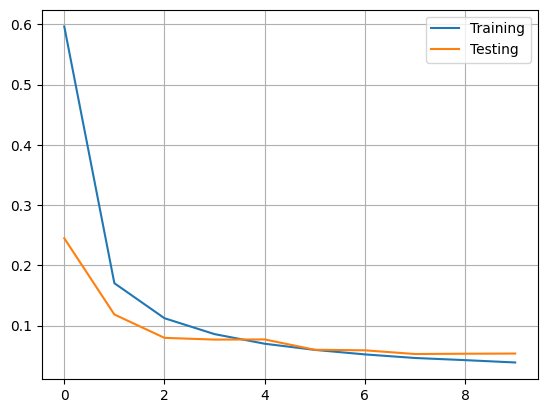

In [8]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [9]:
pred = np.argmax(model.predict_on_batch(X_test), axis=-1)
cm = me.confusion_matrix(y_test, pred)

plot_confusion_matrix(cm)

313/313 [==============================] - 2s 6ms/step
pred.shape =  (10000, 10)


array([[ 976,    0,    1,    0,    1,    0,    0,    2,    0,    0],
       [   0, 1133,    0,    2,    0,    0,    0,    0,    0,    0],
       [   3,    4, 1014,    3,    3,    0,    0,    2,    3,    0],
       [   0,    0,    1, 1003,    0,    2,    0,    0,    2,    2],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   4,    0,    0,    7,    2,  872,    0,    1,    3,    3],
       [  12,    3,    1,    1,    7,    3,  926,    0,    5,    0],
       [   0,    5,    5,    2,    3,    0,    0, 1012,    1,    0],
       [   4,    1,    1,    0,    3,    0,    0,    3,  959,    3],
       [   3,    4,    0,    3,    6,    2,    0,    2,    2,  987]])